In [ ]:
###############################################################################################################
# Audio-driven upper-body motion synthesis on a humanoid robot
# Computer Science Tripos Part III Project
# Jan Ondras (jo356@cam.ac.uk), Trinity College, University of Cambridge
# 2017/18
###############################################################################################################
# Results (tables, plots) from validation of the LSTM-SI models (architecture choice and effect of dropout).
###############################################################################################################

N_runs =  1 N_features =  26
trainHistES_1_26_03
trainHistES_1_26_06
trainHistES_1_26_09
trainHistES_1_26_12
trainHistES_1_26_15
trainHistES_1_26_18
trainHistES_1_26_21
trainHistES_1_26_24
trainHistES_1_26_27
trainHistES_1_26_30


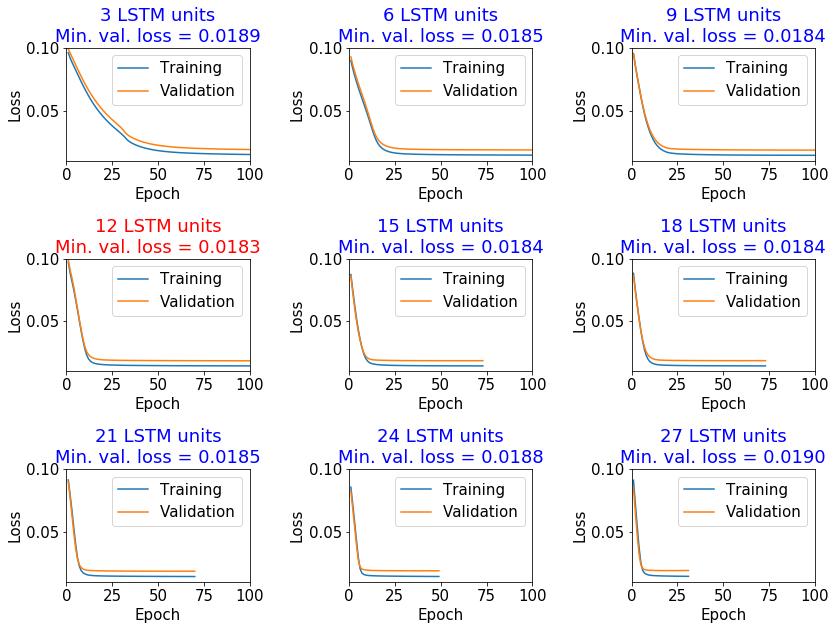

Training was stopped (using Early stopping) when validation loss did not improve for 10 consecutive epochs.
╒════════════════╤════════════════╤═══════════════════════╤════════════╤════════════════╕
│  # LSTM units  │  # parameters  │  Min validation loss  │  # epochs  │  Min at epoch  │
╞════════════════╪════════════════╪═══════════════════════╪════════════╪════════════════╡
│       3        │      404       │       0.018852        │    100     │      100       │
├────────────────┼────────────────┼───────────────────────┼────────────┼────────────────┤
│       6        │      869       │       0.0185082       │    100     │      100       │
├────────────────┼────────────────┼───────────────────────┼────────────┼────────────────┤
│       9        │      1406      │       0.018393        │    100     │       97       │
├────────────────┼────────────────┼───────────────────────┼────────────┼────────────────┤
│       12       │      2015      │       0.0183172       │    100     │       99 

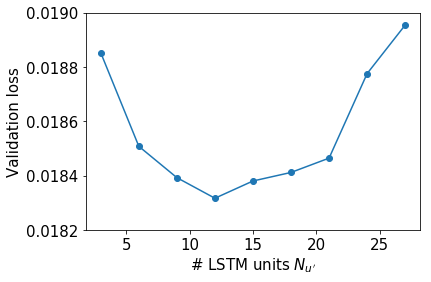

I found 2 local minimam in the loss function:
I futher use architecture given by the global minima
OR: I examine both minima (since MSE is not the only measure ...)


In [5]:
###############################################################################################################
# Plot training history (loss curves) for various LSTM models in terms of # LSTN units
###############################################################################################################
import glob
import numpy as np
import matplotlib.pyplot as plt
from evalutils import plot_training_history
from tabulate import tabulate

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

TE_folder = 'TrainingExamples_16kHz'

max_epoch = 100

N_runs = 1
N_features = 26

training_hist_path_prefix = './../Dataset/'+TE_folder+'/Results/LSTM_SI/trainHistES_' + str(N_runs) + '_' + str(N_features) + '_'

print "N_runs = ", N_runs, "N_features = ", N_features

N_LSTM_units_list = []
min_val_loss_list = []      # mininum val_loss (over epochs) for each of N_LSTM_units
N_params_list = []          # #params for architecture with N_LSTM_units
N_epochs_list = []          # # training epochs 
min_at_epoch = []           # When val_loss averaged over runs

# Exclude training history of dropout comparison
filenames = [ x for x in sorted(glob.glob(training_hist_path_prefix + '*')) if 'DROP' not in x ]

for i, f in enumerate(filenames):

    model_type = f[:-4].split('/')[-1]
    print model_type

    d = np.load(f)
    loss_mat = d['loss']                  # matrix (N_runs, N_epochs)
    val_loss_mat = d['val_loss']
    N_LSTM_units = d['N_LSTM_units']
    
    if N_LSTM_units > 27:
        continue
    N_LSTM_units_list.append( N_LSTM_units )
    N_params = d['N_params']
    N_params_list.append( N_params )

    N_epochs_list.append( loss_mat.shape[1] )

    # 1 run only
    if N_runs == 1:
        loss = loss_mat[0, :max_epoch]
        val_loss = val_loss_mat[0, :max_epoch]
        min_val_loss_list.append( np.min(val_loss) ) 
        min_at_epoch.append( np.argmin(val_loss) + 1 )
        
    ##############################################################
    # Plot 3x3 figure of loss curves for various architectures
    if i == 0:
        fig = plt.figure(figsize=(12,9))
    ep = np.arange(len(loss)) + 1
    ax = fig.add_subplot(3, 3, i+1) 
    ax.plot(ep, loss)#, 'o-')
    ax.plot(ep, val_loss)#, 'o-')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    #ax.set_ylabel('Mean squared error loss (scaled)')
    ax.set_xlim(0, 100)
    ax.set_ylim(0.01, 0.1)
    ax.legend(['Training', 'Validation'])
    if i == 3:
        c = 'r'
    else:
        c = 'b' # k ?
    ax.set_title(str(N_LSTM_units) + ' LSTM units\nMin. val. loss = {:.4f}'.format(min_val_loss_list[-1]), color=c)
plt.tight_layout()
plt.show()
        
print "Training was stopped (using Early stopping) when validation loss did not improve for 10 consecutive epochs."
   
print "==================================================================================="
headers = [
    '# LSTM units', 
    '# parameters', # MSE
    'Min validation loss',
    '# epochs',
    'Min at epoch'
]
min_val_loss_list = np.array(min_val_loss_list)
# min_val_loss_std_list = np.array(min_val_loss_std_list)
N_params_list = np.array(N_params_list)
N_epochs_list = np.array(N_epochs_list)
min_at_epoch = np.array(min_at_epoch)
tab_data = np.concatenate(([N_params_list], [min_val_loss_list], [N_epochs_list], [min_at_epoch]), axis=0).T
print tabulate(tab_data, headers=headers, 
               tablefmt='fancy_grid', 
               showindex=N_LSTM_units_list, 
               numalign='center'
              )

plt.figure()
#plt.fill_between(N_LSTM_units_list, min_val_loss_list - min_val_loss_std_list, min_val_loss_list + min_val_loss_std_list, alpha=0.3)#, color='b')
plt.plot(N_LSTM_units_list, min_val_loss_list, 'o-')
plt.xlabel(r"# LSTM units $N_{u'}$")
plt.ylabel('Validation loss')
plt.ylim(0.0182, 0.0190)
plt.show()
print "I found 2 local minimam in the loss function:"
print "I futher use architecture given by the global minima"
print "OR: I examine both minima (since MSE is not the only measure ...)"

N_runs =  1 N_features =  26 N_LSTM_units =  12
./../Dataset/TrainingExamples_16kHz/Results/LSTM_SI/trainHistES_1_26_12_DROP_0.00_0.00
./../Dataset/TrainingExamples_16kHz/Results/LSTM_SI/trainHistES_1_26_12_DROP_0.25_0.25
./../Dataset/TrainingExamples_16kHz/Results/LSTM_SI/trainHistES_1_26_12_DROP_0.50_0.50


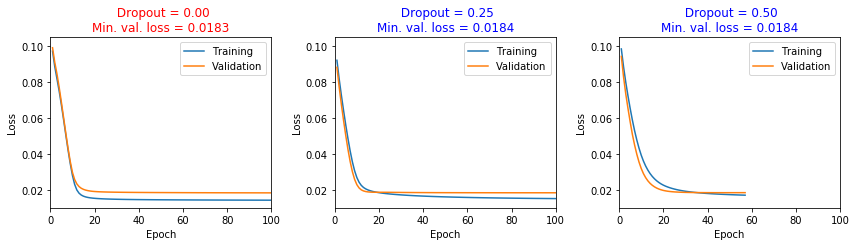

Min losses: [0.018317240038287313, 0.01836155792093438, 0.01841383925582989]
Epochs: [100, 100, 57]
Minima at epoch: [99, 94, 47]


In [19]:
###############################################################################################################
# Plot training history for BEST LSTM model for various DROPOUTS
# also show evaluation on validation set, various measures + plots
###############################################################################################################
import glob
import numpy as np
import matplotlib.pyplot as plt
from evalutils import plot_training_history
from tabulate import tabulate

TE_folder = 'TrainingExamples_16kHz'

max_epoch = 100

N_runs = 1
N_features = 26
N_LSTM_units = 12 # BEST FOUND
dropouts_range = [[0., 0.], [0.25, 0.25], [0.5, 0.5]]

training_hist_path_prefix = './../Dataset/'+TE_folder+'/Results/LSTM_SI/trainHistES_' + str(N_runs) + '_' + str(N_features) + '_' + str(N_LSTM_units)

print "N_runs = ", N_runs, "N_features = ", N_features, "N_LSTM_units = ", N_LSTM_units

min_val_loss_list = []      # mininum val_loss (over epochs) for each of N_LSTM_units
N_epochs_list = []          # # training epochs 
min_at_epoch = []           # When val_loss averaged over runs

########################################
# Plot training history

for i,dropouts in enumerate(dropouts_range):
    
    f = training_hist_path_prefix + '_DROP_{:.2f}_{:.2f}'.format(dropouts[0], dropouts[1])
    print f

    d = np.load(f + '.npz')
    loss_mat = d['loss']                  # matrix (N_runs, N_epochs)
    val_loss_mat = d['val_loss']

    N_epochs_list.append( loss_mat.shape[1] )

    # 1 run only
    if N_runs == 1:
        loss = loss_mat[0, :max_epoch]
        val_loss = val_loss_mat[0, :max_epoch]
        min_val_loss_list.append( np.min(val_loss) ) 
        min_at_epoch.append( np.argmin(val_loss) + 1 )
    
    ##############################################################
    # Plot 1x3 figure of loss curves for various architectures
    if i == 0:
        fig = plt.figure(figsize=(12,9))
    ep = np.arange(len(loss)) + 1
    ax = fig.add_subplot(3, 3, i+1) 
    ax.plot(ep, loss)#, 'o-')
    ax.plot(ep, val_loss)#, 'o-')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    #ax.set_ylabel('Mean squared error loss (scaled)')
    ax.set_xlim(0, 100)
    ax.set_ylim(0.01, 0.105)
    ax.legend(['Training', 'Validation'])
    if i == 0:
        c = 'r'
    else:
        c = 'b' # k ?
    ax.set_title(' Dropout = {:.2f}\nMin. val. loss = {:.4f}'.format(dropouts[0], min_val_loss_list[-1]), color=c)
plt.tight_layout()
plt.show()    
print "Min losses:", min_val_loss_list
print "Epochs:", N_epochs_list
print "Minima at epoch:", min_at_epoch

In [ ]:
#######################################################################################################
# Compare dropouts - plots
#######################################################################################################

import numpy as np
import time
import glob
from evalutils import show_test_results, plot_predictions

dropouts_range = [[0., 0.], [0.25, 0.25], [0.5, 0.5]]
N_runs = 1
N_features = 26
N_LSTM_units = 12 # BEST FOUND

tuning_type = '1_35_AF26'
TE_folder = 'TrainingExamples_16kHz'
save_results_path_prefix = './../Dataset/'+TE_folder+'/Results/LSTM_SI/'

for dropouts in dropouts_range:
    
    print "DROPOUT: ", dropouts
    model_type = '{:d}_{:d}_{:02d}_DROP_{:.2f}_{:.2f}'.format(N_runs, N_features, N_LSTM_units, dropouts[0], dropouts[1])
    d = np.load(save_results_path_prefix + 'MSBMvaltest_' + model_type + '.npz')
    
    ###############################################################################
    # Show testing results: for raw Y and smoothed Y
    #print "===========================================Raw=====================\n"
    #show_test_results(d['results_raw'])
    print "===========================================Smooth=====================\n"
    show_test_results(d['results_smooth'])
    print "================================================================\n"

    ###############################################################################
    # Plot predictions (post-smoothed and raw) against ground truths and audio 
    t_VID = 3 # test VID to show
    if t_VID >= len(d['Y_raw_list']):
        raise ValueError("Required test VID is out of bounds!")
    Y_true = d['Y_true_list'][t_VID]
    Y_raw = d['Y_raw_list'][t_VID]
    Y_smooth = d['Y_smooth_list'][t_VID]
    test_VID = d['test_VIDs'][t_VID]

    plot_predictions(Y_true, Y_raw, Y_smooth, 'LSTM_SI', angles_to_show='all', 
                         plot_start=13.0, plot_length=3.0, input_mode='time', SD_offset=None, 
                         test_VID=test_VID)

DROPOUT:  [0. 0.]
DROPOUT:  [0.25 0.25]
DROPOUT:  [0.5 0.5]
LSTM_SI EVALUATION ON VALIDATION SET: effect of dropout
╒═══════════╤═══════════╤═════════╤══════════════╤════════════════╤══════════════╕
│  Dropout  │   Loss    │  RMSE   │  Delta LCCA  │  LCCA (Yt,Yp)  │  Delta jerk  │
╞═══════════╪═══════════╪═════════╪══════════════╪════════════════╪══════════════╡
│     0     │ 0.0180595 │ 13.628  │  0.0408726   │    0.984114    │   11634.3    │
├───────────┼───────────┼─────────┼──────────────┼────────────────┼──────────────┤
│   0.25    │ 0.0181458 │ 13.7873 │  0.0439461   │    0.984644    │   11800.3    │
├───────────┼───────────┼─────────┼──────────────┼────────────────┼──────────────┤
│    0.5    │ 0.0180284 │ 13.7705 │  0.0419652   │    0.985231    │   11781.2    │
╘═══════════╧═══════════╧═════════╧══════════════╧════════════════╧══════════════╛
\begin{tabular}{cccccc}
\toprule
  Dropout  &   Loss    &  RMSE   &  Delta LCCA  &  LCCA (Yt,Yp)  &  Delta jerk  \\
\midrule
     0     &

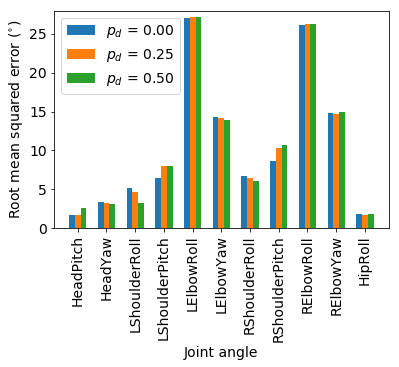

In [9]:
#######################################################################################################
# Compare dropouts - table
#######################################################################################################
import numpy as np
import time
import glob
from evalutils import show_test_results, plot_predictions, plot_4RMSE, calculate_norm_delta_jerk_onList
from tabulate import tabulate

dropouts_range = np.array([[0., 0.], [0.25, 0.25], [0.5, 0.5]])
N_runs = 1
N_features = 26
N_LSTM_units = 12 # BEST FOUND

tuning_type = '1_35_AF26'
TE_folder = 'TrainingExamples_16kHz'
save_results_path_prefix = './../Dataset/'+TE_folder+'/Results/LSTM_SI/'

dropout_labels = []

RMSE = []
RMSEbyAngles = []
localCCA_XYt = []
localCCA_XYp = []
localCCA_YY = []
jerk = []
jerk_delta = []
localCCA_delta = []
losses = []

for dropouts in dropouts_range:
    
    print "DROPOUT: ", dropouts
    dropout_labels.append( '$p_d$ = {:.2f}'.format(dropouts[0]) )
    model_type = '{:d}_{:d}_{:02d}_DROP_{:.2f}_{:.2f}'.format(N_runs, N_features, N_LSTM_units, dropouts[0], dropouts[1])
    dd = np.load(save_results_path_prefix + 'MSBMvaltest_' + model_type + '.npz')
    losses.append( dd['test_loss'] )     

    results_smooth = dd['results_smooth']
    RMSE.append( results_smooth[1][0] ) # overall RMSE
    RMSEbyAngles.append( results_smooth[0][0] ) # RMSE by angles
    #print results_smooth[1][0], results_smooth[3]['XYt'][0], results_smooth[4]['pred']
    localCCA_XYt.append( results_smooth[3]['XYt'][0] )
    localCCA_XYp.append( results_smooth[3]['XYp'][0] )
    localCCA_YY.append( results_smooth[3]['YtYp'][0] )
    localCCA_delta.append( abs(results_smooth[3]['XYt'][0] - results_smooth[3]['XYp'][0]) )
    
    jerk.append( np.sum( results_smooth[4]['pred'] ) )
    #jerk_delta.append( abs( np.sum( results_smooth[4]['pred'] ) - np.sum( results_smooth[4]['true'] ) ) )
    
    # RECALCULATED JERK 
    #print d['Y_true_list'].shape
    Y_true_list = dd['Y_true_list']
    Y_pred_list = dd['Y_smooth_list']
    jerk_delta.append( np.sum( calculate_norm_delta_jerk_onList(Y_true_list, Y_pred_list) ) )

    
#########################################################
headers = [
    'Dropout', 
    'Loss', 
    'RMSE', 
    'Delta LCCA',
    'LCCA (Yt,Yp)',
    'Delta jerk'
]
tab_data = np.concatenate(([dropouts_range[:,0]], [losses], [RMSE], [localCCA_delta], [localCCA_YY], [jerk_delta]), axis=0).T
print "LSTM_SI EVALUATION ON VALIDATION SET: effect of dropout"
print tabulate(tab_data, headers=headers, 
               tablefmt='fancy_grid', 
               #showindex=feature_sets, 
               numalign='center'
              )
print tabulate(tab_data, headers=headers, 
               tablefmt='latex_booktabs', 
               #showindex=feature_sets, 
               numalign='center'
              )

##########################################
# Show bar plot - RMSE by angles

from evalutils import angles_names
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
def plot_4RMSE(rmses_byAngles, labels, stds=[], y_max=28.):
    
    N_series = len(labels)
    N_angles = len(rmses_byAngles[0])
    xaxis = np.arange(N_angles)
    w = 0.2 # bar width
#     plt.figure(figsize=(12,4))
    plt.figure()
    for i in range(N_series):
        if len(stds) == 0:
            plt.bar(xaxis - 0.5*N_series*w + i*w, rmses_byAngles[i], width=w, align='edge', label=labels[i])
        else:
            plt.bar(xaxis - 0.5*N_series*w + i*w, rmses_byAngles[i], yerr=stds[i], width=w, align='edge', label=labels[i])
    plt.ylabel('Root mean squared error ($^{\circ}$)') #, fontsize=14)
    plt.xlabel('Joint angle')
    plt.xticks(xaxis, angles_names[:N_angles], rotation=90)
    plt.ylim(0, y_max)
    plt.legend(loc='upper left')
    plt.show()
    
    
plot_4RMSE(RMSEbyAngles, dropout_labels)